In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_1 = pd.read_csv("train_1.csv")

In [5]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [52]:
key_1 = pd.read_csv("key_1.csv")

In [54]:
key_1.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [50]:
key_1.columns

Index(['Page', 'Id', 'Date', 'Full_Page'], dtype='object')

In [11]:
train_1.fillna(0, inplace =True)

In [13]:
def extract_details(page):
    sections = page.split('_')
    if len(sections)<3:
        return pd.Series([page, 'unknown', 'unknown', 'unknown'])
    article = '_'.join(sections[:-3])
    language = sections[-3]
    access = sections[-2]
    agent = sections[-1]
    return pd.Series([article, language, access, agent])

In [15]:
train_1[['Article', 'Language', 'Access', 'Agent']] = train_1['Page'].apply(extract_details)

In [17]:
train_1_long = train_1.melt(id_vars=['Page', 'Article', 'Language', 'Access', 'Agent'],
                           var_name = 'Date', value_name = 'Views')

In [19]:
train_1_long['Date'] = pd.to_datetime(train_1_long['Date'])

In [21]:
train_1_long.head()

,Page,Article,Language,Access,Agent,Date,Views
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh.wikipedia.org,all-access,spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh.wikipedia.org,all-access,spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,3C,zh.wikipedia.org,all-access,spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh.wikipedia.org,all-access,spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,2015-07-01,0.0


In [23]:
train_1_long.sort_values(['Page', 'Date'], inplace=True)

In [24]:
print('Final melted shape: ', train_1_long.shape)

Final melted shape:  (79784650, 7)


In [25]:
train_1_long.head()

,Page,Article,Language,Access,Agent,Date,Views
37206,!vote_en.wikipedia.org_all-access_all-agents,!vote,en.wikipedia.org,all-access,all-agents,2015-07-01,3.0
182269,!vote_en.wikipedia.org_all-access_all-agents,!vote,en.wikipedia.org,all-access,all-agents,2015-07-02,4.0
327332,!vote_en.wikipedia.org_all-access_all-agents,!vote,en.wikipedia.org,all-access,all-agents,2015-07-03,7.0
472395,!vote_en.wikipedia.org_all-access_all-agents,!vote,en.wikipedia.org,all-access,all-agents,2015-07-04,4.0
617458,!vote_en.wikipedia.org_all-access_all-agents,!vote,en.wikipedia.org,all-access,all-agents,2015-07-05,4.0


In [35]:
train_1_long.to_csv('train_1_preprocessed.csv', index = False)

In [39]:
train_1_long.to_parquet('train_1_preprocessed.parquet', index = False)

In [29]:
train_1_long.head(5000).to_csv('train_preview.csv')

In [56]:
#Vectorised approach

key_1['Page'] = key_1['Page'].astype(str)

#Split the last underscored part form the page name
key_1['Date'] = key_1['Page'].str.rsplit('_', n=1).str[-1]

#Removing the data from page
key_1['Page'] = key_1['Page'].str.rsplit('_', n=1).str[0]

key_1['Date'] = pd.to_datetime(key_1['Date'])

In [58]:
key_1.head()

,Page,Id,Date
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05


Weekly Seasonality

In [60]:
train_1_long['Weekday'] = train_1_long['Date'].dt.day_name()
views_per_week = train_1_long.groupby('Weekday')['Views'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

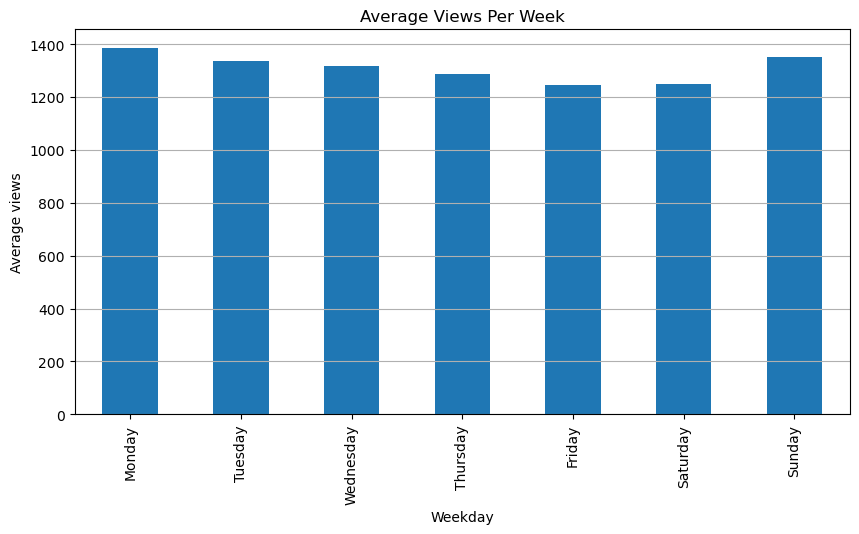

In [66]:
views_per_week.plot(kind = 'bar', figsize=(10, 5), title='Average Views Per Week')
plt.ylabel('Average views')
plt.grid(axis = 'y')
plt.show()

Missing/Zero value

In [68]:
zero_page_views = train_1_long[train_1_long['Views']==0]
print('Total number of Zero page views: ', len(zero_page_views))

#Pages with most zeros
zero_page_count = zero_page_views.groupby('Page').size().sort_values(ascending=False)
print('Pages with most zero view days: ', zero_page_count.head(10))

Total number of Zero page views:  7253349
Pages with most zero view days:  Page
User:46.161.9.22_www.mediawiki.org_all-access_spider                                    550
File:Battle_of_Mosul_(2016–2017).svg_commons.wikimedia.org_all-access_spider            550
Category:Deletion_requests_February_2017_commons.wikimedia.org_all-access_all-agents    550
Category:Deletion_requests_February_2017_commons.wikimedia.org_all-access_spider        550
Category:Deletion_requests_February_2017_commons.wikimedia.org_desktop_all-agents       550
Category:Deletion_requests_January_2017_commons.wikimedia.org_all-access_all-agents     550
Category:Deletion_requests_January_2017_commons.wikimedia.org_all-access_spider         550
Category:Deletion_requests_January_2017_commons.wikimedia.org_desktop_all-agents        550
File:Battle_of_Mosul_(2016–2017).svg_commons.wikimedia.org_all-access_all-agents        550
File:Battle_of_Mosul_(2016–2017).svg_commons.wikimedia.org_desktop_all-agents           550


Distribution of Daily Views

<function matplotlib.pyplot.show(close=None, block=None)>

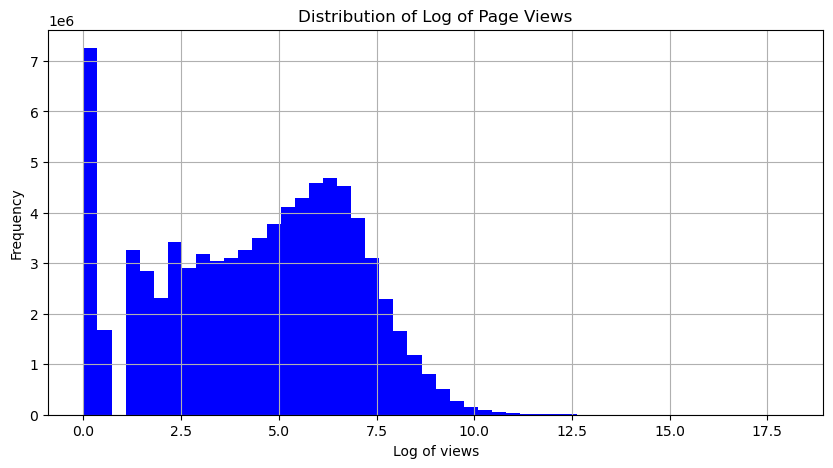

In [72]:
plt.figure(figsize = (10, 5))
plt.hist(np.log1p(train_1_long['Views']), bins=50, color='blue')
plt.title('Distribution of Log of Page Views')
plt.xlabel('Log of views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show

Plotting Single Articles TimeSeries

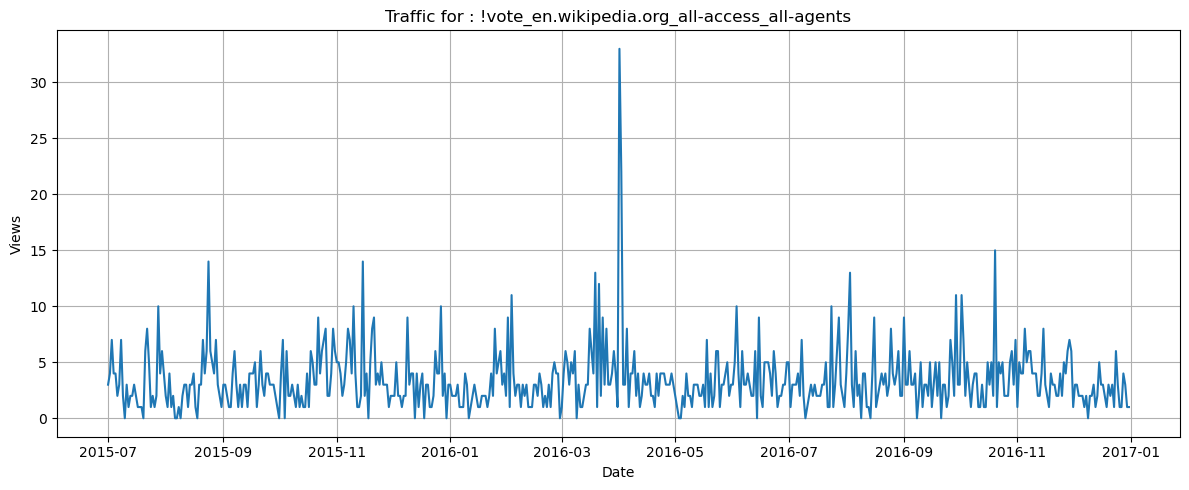

In [78]:
selected_page = train_1_long['Page'].unique()[0]
#filter the page

df_page = train_1_long[train_1_long['Page']==selected_page]

plt.figure(figsize = (12,5))
plt.plot(df_page['Date'], df_page['Views'])
plt.title(f"Traffic for : {selected_page}")
plt.xlabel('Date')
plt.ylabel('Views')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 and Bottom 10 pages by total views

In [81]:
total_views = train_1_long.groupby('Page')['Views'].sum().sort_values(ascending = False)

top_pages = total_views.head(10)
bottom_pages = total_views.tail(10)

print('Top 10 pages: ', top_pages)
print('Bottom 10 pages: ', bottom_pages)

Top 10 pages:  Page
Main_Page_en.wikipedia.org_all-access_all-agents                      1.206618e+10
Main_Page_en.wikipedia.org_desktop_all-agents                         8.774497e+09
Main_Page_en.wikipedia.org_mobile-web_all-agents                      3.153985e+09
Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents           1.603934e+09
Special:Search_en.wikipedia.org_all-access_all-agents                 1.304079e+09
Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents           1.112689e+09
Заглавная_страница_ru.wikipedia.org_all-access_all-agents             1.086019e+09
Special:Search_en.wikipedia.org_desktop_all-agents                    1.011848e+09
Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents    8.684807e+08
Wikipedia:Portada_es.wikipedia.org_all-access_all-agents              7.514923e+08
Name: Views, dtype: float64
Bottom 10 pages:  Page
Kartal_(Klapper)_de.wikipedia.org_desktop_all-agents                                               

Compare Top 5 pages

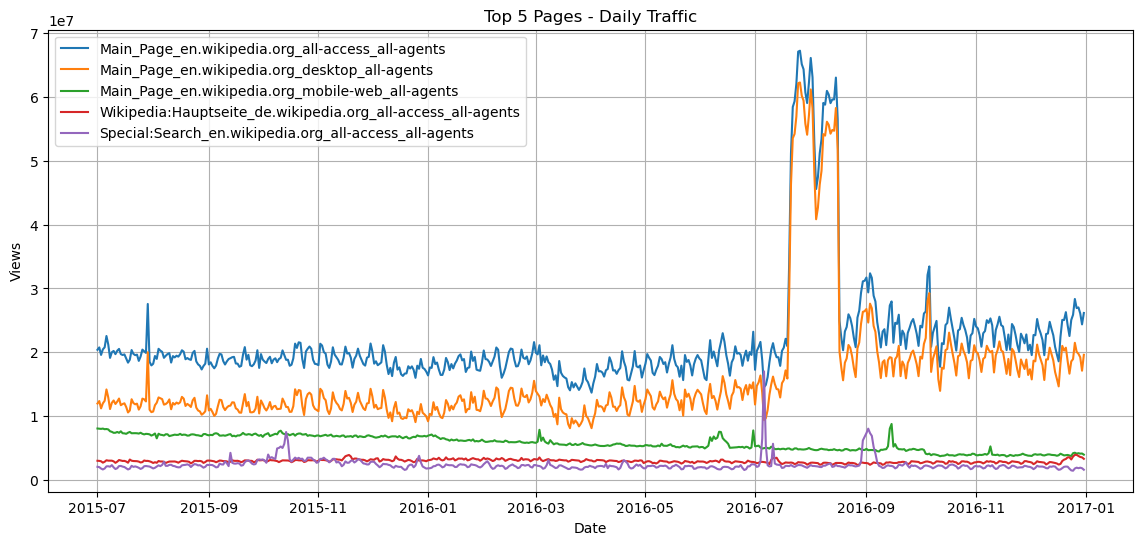

In [84]:
top_pages = total_views.head(5).index.tolist()

plt.figure(figsize = (14,6))
for page in top_pages:
    pages = train_1_long[train_1_long['Page'] == page]
    plt.plot(pages['Date'], pages['Views'], label = page)

plt.legend()
plt.title('Top 5 Pages - Daily Traffic')
plt.xlabel('Date')
plt.ylabel('Views')
plt.grid(True)
plt.show()